--- Logistic Regression Step-by-Step Training ---
Iteration  | Slope (m)  | Intercept (c)   | Loss (Error)
------------------------------------------------------------
0          | 0.1013     | 0.0000          | 0.6931    
400        | 1.2616     | -3.3546         | 0.4062    
800        | 1.4359     | -3.8743         | 0.4018    
1200       | 1.4837     | -4.0159         | 0.4015    
1600       | 1.4981     | -4.0585         | 0.4015    
2000       | 1.5026     | -4.0717         | 0.4015    
------------------------------------------------------------
Final Model: P = 1 / (1 + e^-(1.5026 * Hours + (-4.0717)))


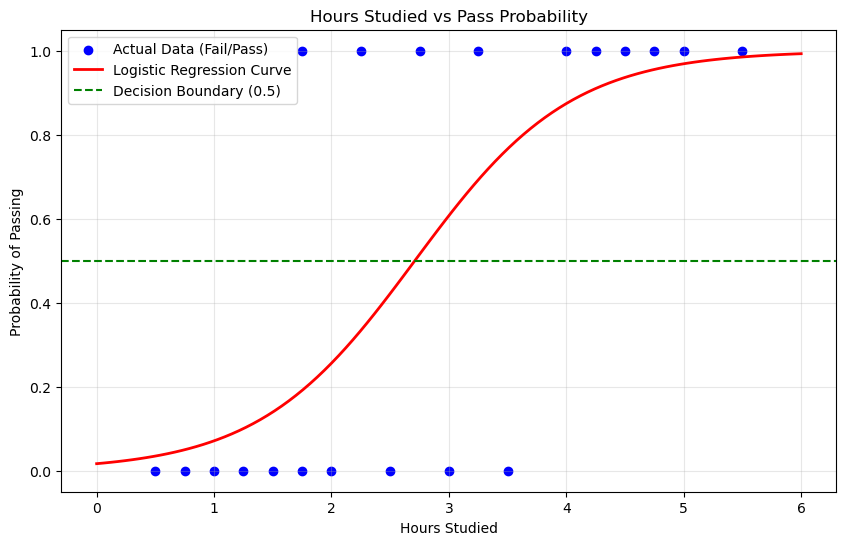

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ১. ডেটা সেট (Table 1: Hours vs Pass)
# x = Hours, y = Pass (1) or Fail (0)
hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
                  2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
pass_exam = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

def sigmoid(z):
    """গাণিতিক সিগময়েড ফাংশন যা মানকে ০ থেকে ১ এর মধ্যে আনে"""
    return 1 / (1 + np.exp(-z))

def solve_logistic_regression():
    # ২. শুরুতে প্যারামিটার সেট করা (Initialization)
    m = 0.0          # Slope
    c = 0.0          # Intercept
    lr = 0.2         # Learning Rate
    epochs = 2001    # কতবার লুপ চলবে
    n = len(hours)

    print("--- Logistic Regression Step-by-Step Training ---")
    print(f"{'Iteration':<10} | {'Slope (m)':<10} | {'Intercept (c)':<15} | {'Loss (Error)':<10}")
    print("-" * 60)

    # ৩. গ্রেডিয়েন্ট ডিসেন্ট লুপ (Training Loop)
    for i in range(epochs):
        # লিনিয়ার অংশ z = mx + c
        z = m * hours + c
        # প্রেডিকশন (Probability)
        h = sigmoid(z)
        
        # গ্রেডিয়েন্ট বা পরিবর্তনের হার বের করা (Calculation using Derivatives)
        dm = (1/n) * np.sum((h - pass_exam) * hours)
        dc = (1/n) * np.sum(h - pass_exam)
        
        # মান আপডেট করা
        m = m - lr * dm
        c = c - lr * dc
        
        # প্রতি ৪০০ ধাপ পর পর ক্যালকুলেশন প্রিন্ট করা
        if i % 400 == 0:
            loss = (-1/n) * np.sum(pass_exam * np.log(h + 1e-9) + (1-pass_exam) * np.log(1 - h + 1e-9))
            print(f"{i:<10} | {m:<10.4f} | {c:<15.4f} | {loss:<10.4f}")

    # ৪. চূড়ান্ত ফলাফল প্রিন্ট করা
    print("-" * 60)
    print(f"Final Model: P = 1 / (1 + e^-({m:.4f} * Hours + ({c:.4f})))")

    # ৫. গ্রাফ তৈরি (Visualization)
    plt.figure(figsize=(10, 6))
    
    # আসল পয়েন্টগুলো (Scatter plot)
    plt.scatter(hours, pass_exam, color='blue', label='Actual Data (Fail/Pass)')
    
    # লজিস্টিক কার্ভ (Sigmoid Curve)
    x_range = np.linspace(0, 6, 100)
    y_prob = sigmoid(m * x_range + c)
    plt.plot(x_range, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')
    
    # ৫০% থ্রেশহোল্ড লাইন
    plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
    
    

    plt.title('Hours Studied vs Pass Probability')
    plt.xlabel('Hours Studied')
    plt.ylabel('Probability of Passing')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    solve_logistic_regression()